In [114]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

import pandas as pd
import numpy as np

import os
from time import time
from time import sleep

import seaborn as sns
from matplotlib import pyplot as plt

In [115]:
#--------------------------------------------------Data Extract-------------------------------------------------

In [116]:
pd.set_option('display.max_columns', None)

In [117]:
def api_call():
  global df
  url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

  parameters = {
    'start':'1',
    'limit':'20',
    'convert':'USD'
  }

  headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'f07caec2-61c6-4d44-a6f6-983d954ce689',
  }

  session = Session()
  session.headers.update(headers)

  try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    # print(data)
  except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

  df = pd.json_normalize(data['data'])
  df['timestamp'] = pd.to_datetime('now')
  # df = pd.concat([df, df2], ignore_index=True, join = 'outer')

  if not os.path.isfile(r'C:\Users\laptop88\Downloads\API Project\API1.csv'):
    df.to_csv(r'C:\Users\laptop88\Downloads\API Project\API1.csv', header='column_names')
  else:
    df.to_csv(r'C:\Users\laptop88\Downloads\API Project\API1.csv', mode='a' ,header=False)


In [118]:
for i in range(333):
    api_call()
    print("API run successfully")
    # sleep(60)
exit()

API run successfully
API run successfully
API run successfully
API run successfully
API run successfully
API run successfully
API run successfully
API run successfully
API run successfully
API run successfully
API run successfully
API run successfully
API run successfully
API run successfully
API run successfully
API run successfully


KeyboardInterrupt: 

In [ ]:
#-----------------------------------------------DataTransform--------------------------------------------------

In [119]:
dfx = pd.read_csv('API1.csv', index_col=0)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [120]:
dfx.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'timestamp'],
      dtype='object')

In [121]:
dfx = dfx.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
dfx = dfx.stack()
dfx = dfx.to_frame(name='values')

index = pd.Index(range(126))
df1 = dfx.reset_index()
df1 = df1.rename(columns={'level_1' : 'percent_change'})

In [122]:
df1['percent_change'] = df1['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])


In [123]:
df1

,name,percent_change,values
0,Bitcoin,1h,-0.54
1,Bitcoin,24h,-2.60
2,Bitcoin,7d,-5.18
3,Bitcoin,30d,-6.35
4,Bitcoin,60d,-14.49
...,...,...,...
121,Cosmos,24h,-14.70
122,Cosmos,7d,-25.34
123,Cosmos,30d,-27.09
124,Cosmos,60d,-29.92


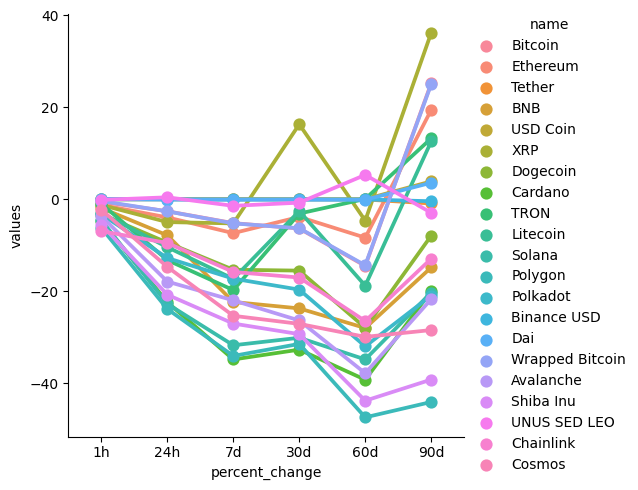

In [124]:
sns.catplot(x='percent_change', y='values', hue='name', data=df1, kind='point' )